# DELIVERY ITEM DATASET
Using the above dataset to evaluate the different linear regression model to predict the delivery time. 

## BUSINESS OBJECTIVE
* Maximize Delivery on time
* Minimize Delay
* Maximize service quality. 

## CONSTRAINTS
* Calamaties.
* Logistic problems. 
* Inefficency. 

## DATA DICTIONARY

| **slno** |      **Name of Feature**     | **Description**                                                          | **Type** | **Relevance** |
|:--------:|:----------------------------|:--------------------------------------------------------------------------|:--------:|:-------------:|
| 1        | Delivery time     | The delivery time of the product.                      | Ratio    | Relevant      |
| 2        | Sorting time | The sorting time of the product.  | Ratio    | Relevant      |

Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from termcolor import colored
from sklearn.model_selection import train_test_split

Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [2]:
df0 = pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass21\delivery_time.csv")
df=df0.copy()
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### EXPLORATORY DATA ANALYSIS & FEATURE ENGINEERING

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [3]:
df.shape

(21, 2)

In [4]:
df.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [6]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


Checking the Number of Duplicates in the Dataset.

In [7]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  0


Checking the Number and Percentage of Missing Values in the Dataset.

In [8]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 Delivery Time    0
Sorting Time     0
dtype: int64


In [9]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 Delivery Time    21
Sorting Time      9
dtype: int64


### First Moment Business Decision or Measures of Central Tendency.
* It gives the mean, median and mode values of the dataset.
* Mean is the average of the data and it easily gets influenced by the outliers.
* Median is the middle most value of the dataset.
* Mode is the most repeated value of the dataset.
* If the mean, median & mode are same then the data has normal distribution otherwise the distribution is not normal.

In [10]:
df.mean()

Delivery Time    16.790952
Sorting Time      6.190476
dtype: float64

In [11]:
df.median()

Delivery Time    17.83
Sorting Time      6.00
dtype: float64

In [12]:
stats.mode(df)

C:\Users\lenny\AppData\Local\Temp\ipykernel_22424\4235401754.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(df)


ModeResult(mode=array([[8., 7.]]), count=array([[1, 4]]))

### Second Moment Business Decision or Measures of Dispersion
* It contains Variance, Standard Deviation & Range.
* It gives a general idea about the spread of data in the dataset.
* Variance is the average squared distance of each data point from the mean.
* Standard deviation is the root of the variance.
* Range is the difference between the max and min data point of the dataset.

In [13]:
df.var()

Delivery Time    25.754619
Sorting Time      6.461905
dtype: float64

In [14]:
df.std()

Delivery Time    5.074901
Sorting Time     2.542028
dtype: float64

### THIRD MOMENT BUSINESS DECISION OR SKEWNESS
* Skewness gives the measure of asymmetry in a data.
* The types of skewness are as follows:
    * Negative skewness or left skewed.
    * Positive skewness or right skewed.
    * If skewness = 0 then it is normally distributed.

In [15]:
df.skew()

Delivery Time    0.352390
Sorting Time     0.047115
dtype: float64

### FOURTH MOMENT BUSINESS DECISION OR KURTOSIS
* Kurtosis is the peakedness of the distribution.
* Negative kurtosis implies a wider peak and thinner tails.
* Positive kurtosis implies a narrow peak and wider tails.

In [16]:
df.kurt()

Delivery Time    0.317960
Sorting Time    -1.148455
dtype: float64

### GRAPHICAL REPRESENTATION

Plotting histograms of each variable.

C:\Users\lenny\AppData\Local\Temp\ipykernel_22424\522995607.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


<function matplotlib.pyplot.show(close=None, block=None)>

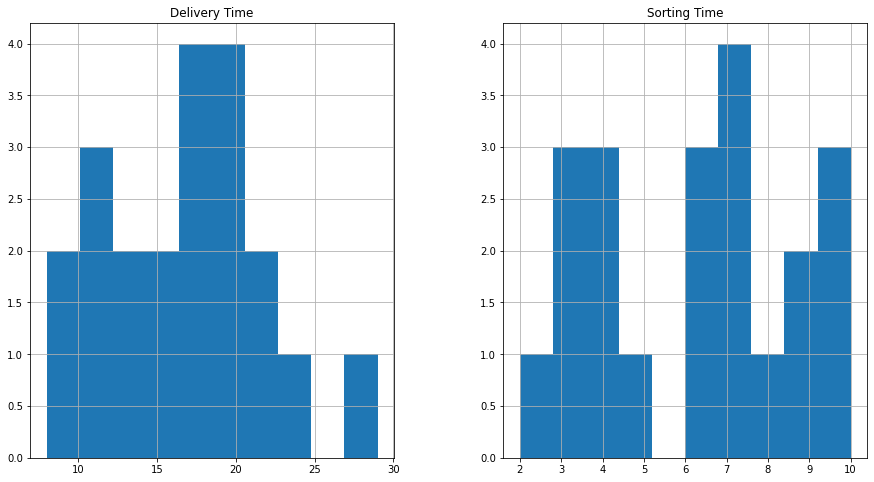

In [17]:
fig=plt.figure(figsize=(15,8))
ax=fig.gca()
df.hist(ax=ax)
plt.show

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


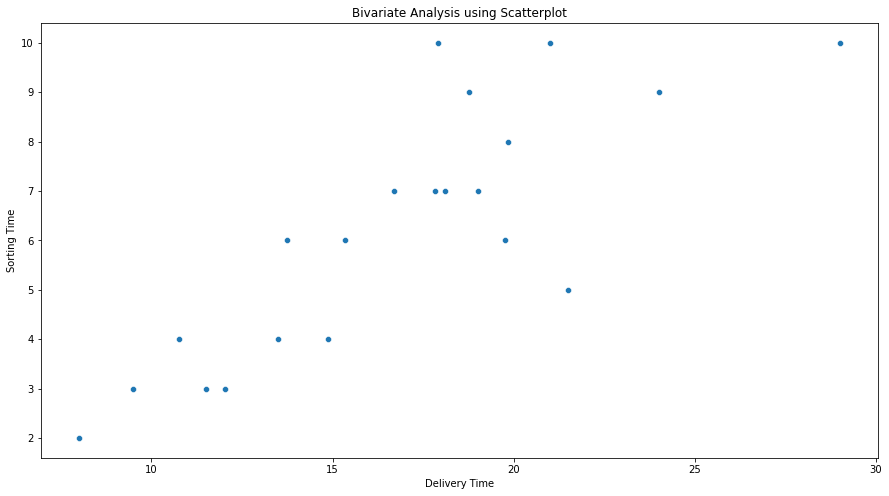

In [18]:
plt.figure(figsize=(15,8))
sns.scatterplot(df['Delivery Time'],df['Sorting Time'])
plt.title("Bivariate Analysis using Scatterplot")
plt.show()

Plotting boxplots of each variable.

In [19]:
df.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Delivery Time'>

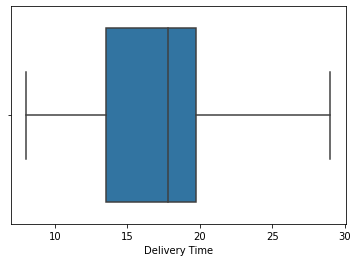

In [20]:
sns.boxplot(df['Delivery Time'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sorting Time'>

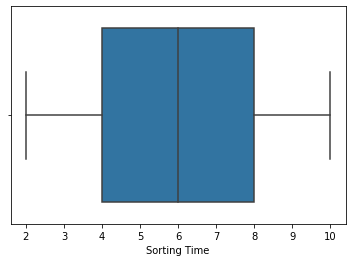

In [21]:
sns.boxplot(df['Sorting Time'])

from the boxplots it is evident that there are no outliers in both the variables. 

__CORRELATION CHART__

<AxesSubplot:>

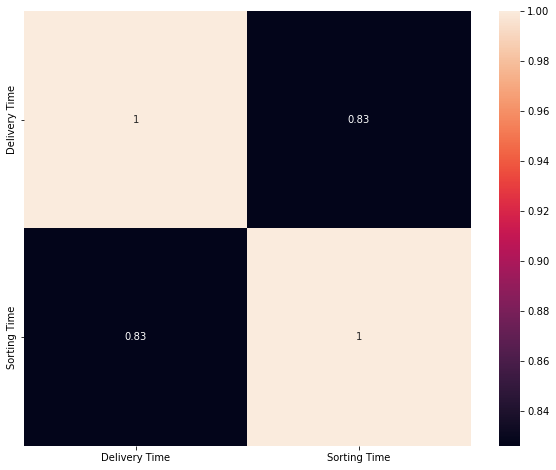

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

from the correlation chart it is clear that the Sorting time has a strong positive correlation with Delivery time.

In [23]:
cov_output = np.cov(df['Delivery Time'], df['Sorting Time'])[0, 1]
cov_output

10.655809523809525

A positive covariance indicates that the two variables tend to move together and with the same sign, a negative covariance indicates that the two variables tend to move in the opposite direction.<br>
__From the covariance value we can infer that the variables move in the same direction.__

### EVALUATING DIFFERENT  MODELS FOR  MODEL BUILDING

Importing the library required for evaluating the models. 

In [24]:
import statsmodels.formula.api as smf

__Simple Linear Regression__

Fitting the model

In [25]:
model1 = smf.ols("df['Delivery Time'] ~ df['Sorting Time']", data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     df['Delivery Time']   R-squared:                       0.682
Model:                             OLS   Adj. R-squared:                  0.666
Method:                  Least Squares   F-statistic:                     40.80
Date:                 Fri, 04 Nov 2022   Prob (F-statistic):           3.98e-06
Time:                         14:20:32   Log-Likelihood:                -51.357
No. Observations:                   21   AIC:                             106.7
Df Residuals:                       19   BIC:                             108.8
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.5827      1.722      3.823      0.001       2.979      10.186
df['Sorting Time']     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Visualization to see how well the model fit the data.

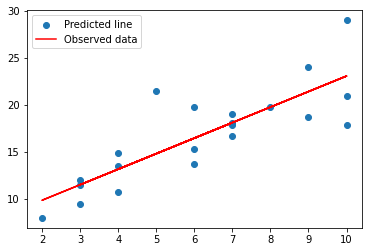

In [26]:
pred1 = model1.predict(pd.DataFrame(df['Sorting Time']))

# Regression Line
plt.scatter(df['Sorting Time'], df['Delivery Time'])
plt.plot(df['Sorting Time'], pred1, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

Error Calculation

In [27]:
res1 = df['Delivery Time'] - pred1
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

2.791650327061766

__Model building on Transformed Data__<br>
* __Log Transformation__

Plotting the scatter plot to understand the correlation and regression line between the transformed variables. 

array([[1.        , 0.83393253],
       [0.83393253, 1.        ]])

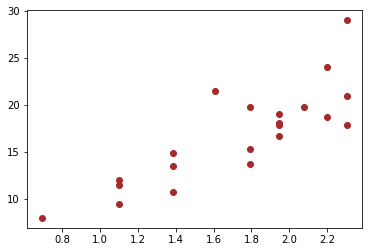

In [28]:
plt.scatter(x = np.log(df['Sorting Time']), y = df['Delivery Time'], color = 'brown')
np.corrcoef(np.log(df['Sorting Time']), df['Delivery Time']) #correlation

Fitting the model on the regression line

In [29]:
model2 = smf.ols("df['Delivery Time'] ~ np.log(df['Sorting Time'])", data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     df['Delivery Time']   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.679
Method:                  Least Squares   F-statistic:                     43.39
Date:                 Fri, 04 Nov 2022   Prob (F-statistic):           2.64e-06
Time:                         14:32:49   Log-Likelihood:                -50.912
No. Observations:                   21   AIC:                             105.8
Df Residuals:                       19   BIC:                             107.9
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(df['Sorting Time'])     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Visualization to see how well the model fit the data. 

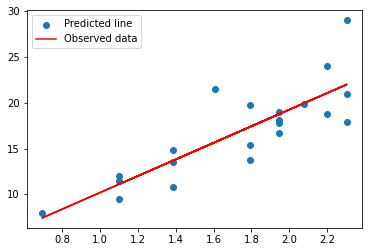

In [30]:
pred2 = model2.predict(pd.DataFrame(df['Sorting Time']))

# Regression Line
plt.scatter(np.log(df['Sorting Time']), df['Delivery Time'])
plt.plot(np.log(df['Sorting Time']), pred2, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

Error calculation

In [31]:
res2 = df['Delivery Time'] - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

2.7331714766820663

* __Exponential transformation__

Plotting the scatter plot to understand the correlation between the transformed variables.

array([[1.        , 0.84317726],
       [0.84317726, 1.        ]])

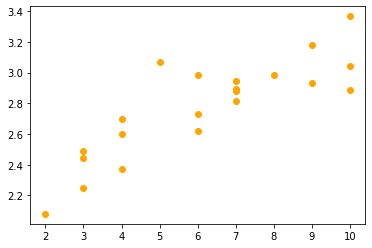

In [32]:
plt.scatter(x = df['Sorting Time'], y = np.log(df['Delivery Time']), color = 'orange')
np.corrcoef(df['Sorting Time'], np.log(df['Delivery Time'])) #correlation

Fitting the model on the regression line

In [33]:
model3 = smf.ols("np.log(df['Delivery Time']) ~ df['Sorting Time']", data = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     np.log(df['Delivery Time'])   R-squared:                       0.711
Model:                                     OLS   Adj. R-squared:                  0.696
Method:                          Least Squares   F-statistic:                     46.73
Date:                         Fri, 04 Nov 2022   Prob (F-statistic):           1.59e-06
Time:                                 14:40:32   Log-Likelihood:                 7.7920
No. Observations:                           21   AIC:                            -11.58
Df Residuals:                               19   BIC:                            -9.495
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.1214      0.103     20.601      0.000       1.906       2.337
df['Sorting Time']     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
pred3 = model3.predict(pd.DataFrame(df['Sorting Time']))
pred3_at = np.exp(pred3)

Visualization to see how well the model fit the data.

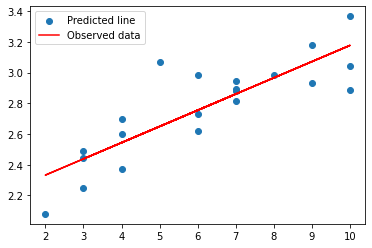

In [35]:
# Regression Line
plt.scatter(df['Sorting Time'], np.log(df['Delivery Time']))
plt.plot(df['Sorting Time'], pred3, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

Error calculation

In [36]:
res3 = df['Delivery Time'] - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

2.940250323056201

* __Polynomial transformation__

Fitting the model on the regression line

In [37]:
model4 = smf.ols("np.log(df['Delivery Time']) ~ df['Sorting Time'] + I(df['Sorting Time']*df['Sorting Time'])", data = df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     np.log(df['Delivery Time'])   R-squared:                       0.765
Model:                                     OLS   Adj. R-squared:                  0.739
Method:                          Least Squares   F-statistic:                     29.28
Date:                         Fri, 04 Nov 2022   Prob (F-statistic):           2.20e-06
Time:                                 14:40:56   Log-Likelihood:                 9.9597
No. Observations:                           21   AIC:                            -13.92
Df Residuals:                               18   BIC:                            -10.79
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      1.6997      0.228      7.441      0.000       1.220       2.180
df['Sorting Time']                             0.2659      0.080      3.315      0.004       0.097       0.434
I(df['Sorting Time'] * df['Sorting Time'])    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
pred4 = model4.predict(pd.DataFrame(df))
pred4_at = np.exp(pred4)

Visualization to see how well the model fit the data.

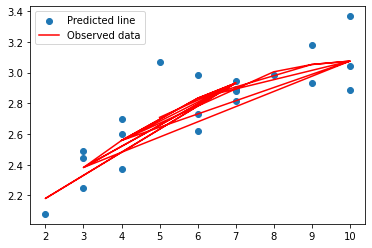

In [39]:
# Regression line
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = df.iloc[:, 1:2].values
X_poly = poly_reg.fit_transform(X)
# y = wcat.iloc[:, 1].values


plt.scatter(df['Sorting Time'], np.log(df['Delivery Time']))
plt.plot(X, pred4, color = 'red')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

Error calculation

In [40]:
res4 = df['Delivery Time']- pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

2.7990419887409277

__Log Transformation on both the variables__

Plotting the scatter plot to understand the correlation between the transformed variables.

array([[1.        , 0.87872712],
       [0.87872712, 1.        ]])

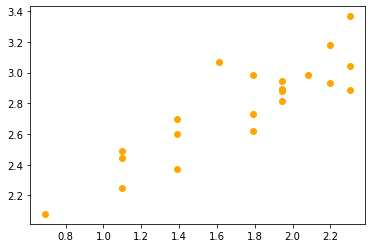

In [48]:
plt.scatter(x = np.log(df['Sorting Time']), y = np.log(df['Delivery Time']), color = 'orange')
np.corrcoef(np.log(df['Sorting Time']), np.log(df['Delivery Time'])) #correlation

Fitting the model

In [49]:
model5 = smf.ols("np.log(df['Delivery Time']) ~ np.log(df['Sorting Time'])", data = df).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     np.log(df['Delivery Time'])   R-squared:                       0.772
Model:                                     OLS   Adj. R-squared:                  0.760
Method:                          Least Squares   F-statistic:                     64.39
Date:                         Sat, 05 Nov 2022   Prob (F-statistic):           1.60e-07
Time:                                 00:03:39   Log-Likelihood:                 10.291
No. Observations:                           21   AIC:                            -16.58
Df Residuals:                               19   BIC:                            -14.49
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      1.7420      0.133     13.086      0.000       1.463       2.021
np.log(df['Sorting Time'])     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
pred5 = model5.predict(pd.DataFrame(df['Sorting Time']))
pred5_at = np.exp(pred5)

Visualization to see how well the model fit the data.

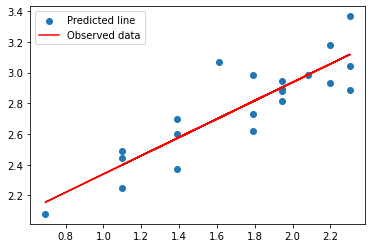

In [51]:
# Regression Line
plt.scatter(np.log(df['Sorting Time']), np.log(df['Delivery Time']))
plt.plot(np.log(df['Sorting Time']), pred5, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

Error Calculation

In [52]:
res5 = df['Delivery Time'] - pred5_at
res_sqr5 = res5 * res5
mse5 = np.mean(res_sqr5)
rmse5 = np.sqrt(mse5)
rmse5

2.74582889761455

                   ** COMPARING THE IMPORTANT VALUES FOR ALL THE DIFFERENT MODELS TO SELECT THE BEST MODEL **

|               **OUTPUT**               |               **INPUT**              | **R VALUE** | **R^2 VALUE** | **RMSE VALUE** |
|:--------------------------------------:|:------------------------------------:|:------------|:-------------:|:--------------:|
|Delivery Time                           |Sorting Time                        | 0.83        | 0.682         | 2.79         |
|Delivery Time                           |log(Sorting Time)                   | 0.834       | 0.695         | 2.73         |
|log(Delivery Time)                      |Sorting Time                        | 0.843       | 0.711         | 2.94         |
|log(Delivery Time)                      |Sorting Time,Sorting Time^2         |             | 0.765         | 2.799       |
|log(Delivery Time)                      |log(Sorting Time)                   |  0.878         | 0.772       | 2.74       |

#### CONCLUSION
From all the different models the last two models had a better  R-square value but the rmse values are almost the same for all the models the last model has a better correlation value.<br>
__So from the above information the last model is the best.__